<a href="https://colab.research.google.com/github/arunmalik1/PlantLeaf_Classification/blob/main/PlantLeaf_Classification_MultiModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is binary classification project using plant images. The idea is to be able to identify diseased vs healthy plants. There are 11 different plants and the entire dataet is divded into 22 categories. 

The dataset is from Kaggle: 
This is a collection of about 4503 images of which contains 2278 images of healthy leaf and 2225 images of the diseased leaf. Twelve plants named as Mango, Arjun, Alstonia Scholaris, Guava, Bael, Jamun, Jatropha, Pongamia Pinnata, Basil, Pomegranate, Lemon, and Chinar have been selected. Images are split between training, test, validating and prediction datasets for model training and testing purposes.



#Import Packages

In [1]:
#need pydicom for images
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.1 MB/s eta 0:00:00


In [2]:
#install opendatasets to get the data from Kaggle
!pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#installing keras tuner 
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.1 MB/s eta 0:00:00


In [4]:
!pip install -q -U keras-tuner

In [12]:
!pip install git+https://github.com/keras-team/keras-preprocessing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-sjc5_cpd
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-sjc5_cpd
  Resolved https://github.com/keras-team/keras-preprocessing.git to commit 3e380065d4afc7347aaee8d89325a16b22158438
  Preparing metadata (setup.py) ... done


In [29]:
!pip install --upgrade transformers
!pip install --upgrade datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 18.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 13.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [30]:
#import packages 
import pandas as pd
import numpy as np
import scipy


#import plot 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
%matplotlib inline
from PIL import Image
import PIL.Image
import seaborn as sns
from tabulate import tabulate
import os

#import keras and tenserflow and pydicom
import keras
import pydicom
import keras_tuner as kt
from keras import layers
from kerastuner import RandomSearch
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import L1
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
from kerastuner.engine.hyperparameters import HyperParameters


#import tenserflow functions
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization




#Import Data

In [6]:
#load the data 
import opendatasets as od
od.download("https://www.kaggle.com/datasets/csafrit2/plant-leaves-for-image-classification?select=Plants_2", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arunmalik78
Your Kaggle Key: ··········


100%|██████████| 6.56G/6.56G [01:02<00:00, 113MB/s]


In [26]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/plant-leaves-for-image-classification/Plants_2/train',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (256,256),
    batch_size = 32)

Found 4274 files belonging to 22 classes.


In [8]:
test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/plant-leaves-for-image-classification/Plants_2/test',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (256,256)
    )

Found 110 files belonging to 22 classes.


In [9]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/plant-leaves-for-image-classification/Plants_2/valid',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (256,256)
    )

Found 110 files belonging to 22 classes.


In [33]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 22), dtype=tf.float32, name=None))>

#Create a base CNN Model

In [ ]:
#get the feature images and labels needed for model creation
# features, labels = next(iter(train_ds))

In [34]:
base_model1 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
base_model1.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3)))

# max pool in 2x2 window
base_model1.add(MaxPooling2D(pool_size=(4, 4)))
# define 3x3 filter window sizes. Create 64 filters.
base_model1.add(Conv2D(64, (3, 3), activation='relu'))
base_model1.add(MaxPooling2D((2, 2)))
base_model1.add(Conv2D(128, (3, 3), activation='relu'))
base_model1.add(MaxPooling2D((2, 2)))
base_model1.add(Conv2D(256, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
base_model1.add(Flatten())
base_model1.add(Dense(64, activation='relu'))
base_model1.add(Dense(22, activation='softmax'))

In [36]:
base_model1.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [40]:
history_cnn = base_model.fit(train_ds, epochs= 20, validation_data= validation_ds)

Epoch 1/20
134/134 [==============================] - 49s 342ms/step - loss: 0.0975 - accuracy: 0.9705 - val_loss: 2.4547 - val_accuracy: 0.6636
Epoch 2/20
134/134 [==============================] - 48s 341ms/step - loss: 0.1629 - accuracy: 0.9469 - val_loss: 3.3705 - val_accuracy: 0.6000
Epoch 3/20
134/134 [==============================] - 48s 340ms/step - loss: 0.1161 - accuracy: 0.9644 - val_loss: 1.8374 - val_accuracy: 0.7273
Epoch 4/20
134/134 [==============================] - 49s 340ms/step - loss: 0.0919 - accuracy: 0.9715 - val_loss: 1.7935 - val_accuracy: 0.7000
Epoch 5/20
134/134 [==============================] - 49s 342ms/step - loss: 0.1037 - accuracy: 0.9677 - val_loss: 2.4868 - val_accuracy: 0.7000
Epoch 6/20
134/134 [==============================] - 49s 340ms/step - loss: 0.0626 - accuracy: 0.9820 - val_loss: 1.9251 - val_accuracy: 0.7091
Epoch 7/20
134/134 [==============================] - 49s 345ms/step - loss: 0.0674 - accuracy: 0.9771 - val_loss: 2.0082 - val_ac

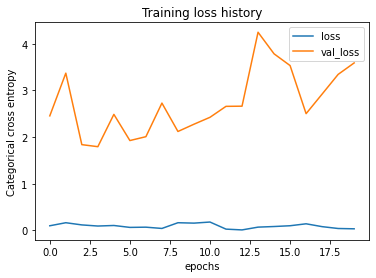

In [41]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

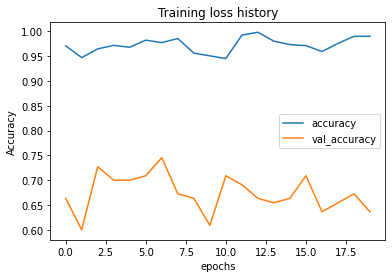

In [42]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [ ]:
base_model1.save('BaseModel.h5')

#Building in a simpler base model because of over fitting 

In [77]:
base_model2 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
base_model2.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3)))

# max pool in 2x2 window
# define 3x3 filter window sizes. Create 64 filters.
base_model2.add(Conv2D(32, (3, 3), activation='relu'))
base_model2.add(MaxPooling2D((2, 2)))
base_model2.add(Conv2D(32, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
base_model2.add(Flatten())
base_model2.add(Dense(32, activation='relu'))
base_model2.add(Dense(22, activation='softmax'))

In [78]:
base_model2.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [79]:
history_cnn = base_model2.fit(train_ds, epochs= 20, validation_data= validation_ds)

Epoch 1/20
134/134 [==============================] - 54s 376ms/step - loss: 2.9115 - accuracy: 0.2204 - val_loss: 2.3511 - val_accuracy: 0.2545
Epoch 2/20
134/134 [==============================] - 54s 379ms/step - loss: 1.5758 - accuracy: 0.5005 - val_loss: 1.8163 - val_accuracy: 0.4455
Epoch 3/20
134/134 [==============================] - 51s 357ms/step - loss: 1.1326 - accuracy: 0.6376 - val_loss: 1.5795 - val_accuracy: 0.5364
Epoch 4/20
134/134 [==============================] - 54s 375ms/step - loss: 0.8885 - accuracy: 0.7183 - val_loss: 2.1132 - val_accuracy: 0.5909
Epoch 5/20
134/134 [==============================] - 54s 377ms/step - loss: 0.6977 - accuracy: 0.7784 - val_loss: 1.6484 - val_accuracy: 0.6364
Epoch 6/20
134/134 [==============================] - 54s 380ms/step - loss: 0.5635 - accuracy: 0.8168 - val_loss: 1.6971 - val_accuracy: 0.5909
Epoch 7/20
134/134 [==============================] - 53s 372ms/step - loss: 0.4625 - accuracy: 0.8456 - val_loss: 1.6479 - val_ac

In [ ]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

In [ ]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

#Use regularizer techniques 

L1 (Lasso Regression)

In [148]:
reg = L1(0.1)

In [149]:
L1_model = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
L1_model.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (3,3),
                        activation='relu',
                        input_shape=(256, 256, 3)))

# max pool in 2x2 window
L1_model.add(MaxPooling2D(pool_size=(4, 4)))
# define 3x3 filter window sizes. Create 64 filters.
L1_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))
L1_model.add(MaxPooling2D((2, 2)))
L1_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

# transition to dense fully-connected part of network
L1_model.add(Flatten())
L1_model.add(Dense(64, activation='relu'))
L1_model.add(Dense(22, activation='softmax'))

In [151]:
opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-05)
L1_model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])

In [152]:
history_cnn = L1_model.fit(train_ds, epochs= 50, validation_data= validation_ds)

Epoch 1/50
134/134 [==============================] - 46s 317ms/step - loss: 92.0673 - accuracy: 0.0842 - val_loss: 82.6464 - val_accuracy: 0.1364
Epoch 2/50
134/134 [==============================] - 46s 316ms/step - loss: 75.2322 - accuracy: 0.1472 - val_loss: 68.0675 - val_accuracy: 0.1909
Epoch 3/50
134/134 [==============================] - 47s 323ms/step - loss: 61.1754 - accuracy: 0.2232 - val_loss: 54.8041 - val_accuracy: 0.1909
Epoch 4/50
134/134 [==============================] - 46s 320ms/step - loss: 48.7291 - accuracy: 0.2836 - val_loss: 43.2908 - val_accuracy: 0.2182
Epoch 5/50
134/134 [==============================] - 46s 319ms/step - loss: 38.1989 - accuracy: 0.3418 - val_loss: 33.8705 - val_accuracy: 0.2636
Epoch 6/50
134/134 [==============================] - 47s 323ms/step - loss: 29.7338 - accuracy: 0.3933 - val_loss: 26.5250 - val_accuracy: 0.3091
Epoch 7/50
134/134 [==============================] - 48s 333ms/step - loss: 23.4168 - accuracy: 0.4478 - val_loss: 21

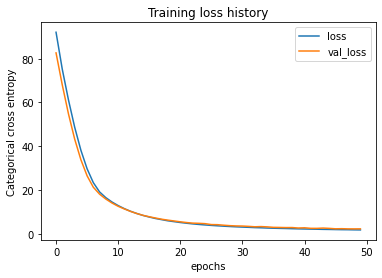

In [153]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

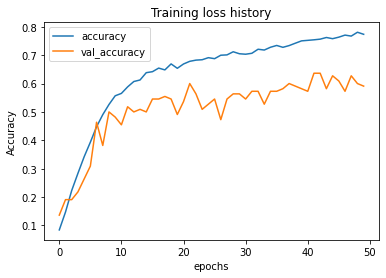

In [154]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

#Model 3 using L2 (Ridge Regression) regularizer

In [127]:
reg = L2(1e-3)

In [128]:
model3 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
model3.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3)))

# max pool in 2x2 window
model3.add(MaxPooling2D(pool_size=(4, 4)))
# define 3x3 filter window sizes. Create 64 filters.
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = reg))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer = reg))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer = reg))

# transition to dense fully-connected part of network
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(22, activation='softmax'))




In [129]:
model3.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])

In [130]:
history_cnn = model3.fit(train_ds, epochs= 10, validation_data= validation_ds)

Epoch 1/10
134/134 [==============================] - 49s 339ms/step - loss: 1656.2992 - accuracy: 0.0751 - val_loss: 20.2089 - val_accuracy: 0.0455
Epoch 2/10
134/134 [==============================] - 51s 357ms/step - loss: 18.5979 - accuracy: 0.0737 - val_loss: 17.5977 - val_accuracy: 0.0455
Epoch 3/10
134/134 [==============================] - 49s 340ms/step - loss: 16.6483 - accuracy: 0.0784 - val_loss: 16.1240 - val_accuracy: 0.0455
Epoch 4/10
134/134 [==============================] - 48s 338ms/step - loss: 15.4322 - accuracy: 0.0763 - val_loss: 15.1213 - val_accuracy: 0.0455
Epoch 5/10
134/134 [==============================] - 49s 341ms/step - loss: 14.5654 - accuracy: 0.0723 - val_loss: 14.3714 - val_accuracy: 0.0455
Epoch 6/10
 84/134 [=================>............] - ETA: 17s - loss: 14.0090 - accuracy: 0.0781

KeyboardInterrupt: ignored

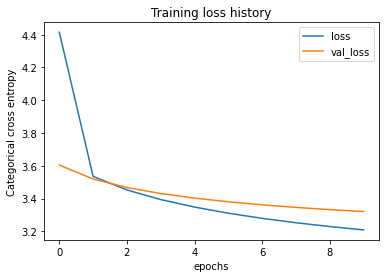

In [ ]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

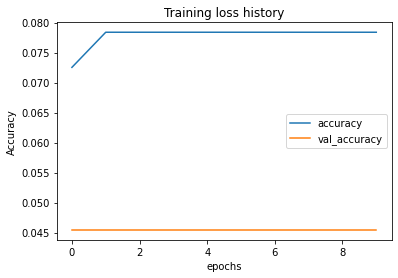

In [ ]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [ ]:
reg = L1(3e-3)

In [ ]:
model3 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
model3.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3)))

# max pool in 2x2 window
model3.add(MaxPooling2D(pool_size=(4, 4)))
# define 3x3 filter window sizes. Create 64 filters.
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = reg))
model3.add(Dropout(0.2)) # dropout on previous activations
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer = reg))
model3.add(Dropout(0.2)) # dropout on previous activations
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer = reg))

# transition to dense fully-connected part of network
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(22, activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 127, 127, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 dropout_11 (Dropout)        (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 12, 12, 128)      

In [ ]:
model3.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn = model3.fit(train_ds, epochs= 10, validation_data= validation_ds)

Epoch 1/10
134/134 [==============================] - 21s 144ms/step - loss: 15.9485 - accuracy: 0.0760 - val_loss: 10.0420 - val_accuracy: 0.0727
Epoch 2/10
134/134 [==============================] - 20s 141ms/step - loss: 8.2149 - accuracy: 0.1970 - val_loss: 7.2023 - val_accuracy: 0.1364
Epoch 3/10
134/134 [==============================] - 20s 141ms/step - loss: 5.8606 - accuracy: 0.2971 - val_loss: 5.5097 - val_accuracy: 0.1636
Epoch 4/10
134/134 [==============================] - 20s 142ms/step - loss: 4.4222 - accuracy: 0.3992 - val_loss: 4.2973 - val_accuracy: 0.2727
Epoch 5/10
134/134 [==============================] - 21s 146ms/step - loss: 3.4120 - accuracy: 0.4951 - val_loss: 3.6827 - val_accuracy: 0.3091
Epoch 6/10
134/134 [==============================] - 20s 142ms/step - loss: 2.7312 - accuracy: 0.5737 - val_loss: 2.9651 - val_accuracy: 0.4364
Epoch 7/10
134/134 [==============================] - 20s 140ms/step - loss: 2.3261 - accuracy: 0.6102 - val_loss: 2.6139 - val_

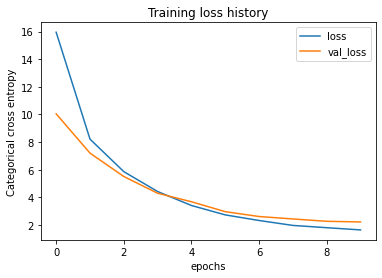

In [ ]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

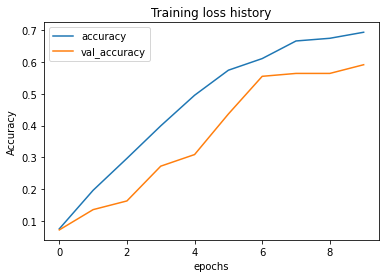

In [ ]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

#try a different value for L1

In [ ]:
reg = L1(3e-5)

In [ ]:
model3 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
model3.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3)))

# max pool in 2x2 window
model3.add(MaxPooling2D(pool_size=(4, 4)))
# define 3x3 filter window sizes. Create 64 filters.
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = reg))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer = reg))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer = reg))

# transition to dense fully-connected part of network
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(22, activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 127, 127, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 6, 6, 128)      

In [ ]:
model3.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn = model3.fit(train_ds, epochs= 10, validation_data= validation_ds)

Epoch 1/10
134/134 [==============================] - 21s 143ms/step - loss: 3.3969 - accuracy: 0.2225 - val_loss: 2.7158 - val_accuracy: 0.2182
Epoch 2/10
134/134 [==============================] - 20s 141ms/step - loss: 1.8118 - accuracy: 0.5005 - val_loss: 2.1233 - val_accuracy: 0.4091
Epoch 3/10
134/134 [==============================] - 20s 142ms/step - loss: 1.2613 - accuracy: 0.6572 - val_loss: 1.8608 - val_accuracy: 0.5727
Epoch 4/10
134/134 [==============================] - 20s 141ms/step - loss: 0.9396 - accuracy: 0.7585 - val_loss: 1.4378 - val_accuracy: 0.5727
Epoch 5/10
134/134 [==============================] - 20s 141ms/step - loss: 0.8151 - accuracy: 0.7934 - val_loss: 1.8834 - val_accuracy: 0.5818
Epoch 6/10
134/134 [==============================] - 20s 141ms/step - loss: 0.6627 - accuracy: 0.8320 - val_loss: 1.8092 - val_accuracy: 0.6091
Epoch 7/10
134/134 [==============================] - 20s 143ms/step - loss: 0.5686 - accuracy: 0.8753 - val_loss: 1.7834 - val_ac

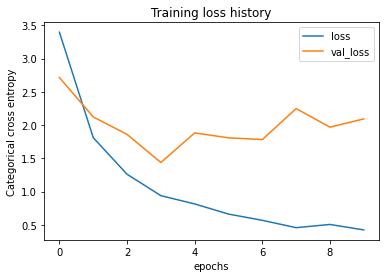

In [ ]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

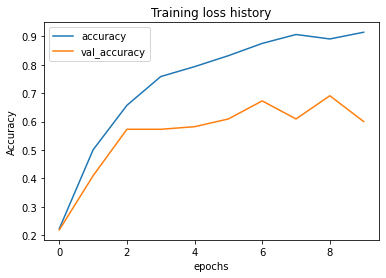

In [ ]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

#Create KerasTuner 

In [ ]:
def build_model(hp):  
  model= keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=64, step=2),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(256,256,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=2),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=64, step=2),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5, 
                     directory= 'test_dir',
                     project_name= 'intro_to_kt')

In [ ]:
tuner.search(train_ds, epochs=10, validation_data = validation_ds)

KeyError: ignored

In [ ]:
best_model = tuner.get_best_models()

#Use Dropout 

In [ ]:
model2 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
model2.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3)))

# max pool in 2x2 window
model2.add(MaxPooling2D(pool_size=(4, 4)))
# define 3x3 filter window sizes. Create 64 filters.
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Dropout(0.2)) # dropout on previous activations
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Dropout(0.2)) # dropout on previous activations
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(256, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(22, activation='softmax'))

In [ ]:
#Add a dropout rate for regularization 
opt = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-05)

In [ ]:
model2.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn = model2.fit(train_ds, epochs= 10, validation_data= validation_ds)